# W1. KADX 가격 데이터 분석

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

Duplicate key in file PosixPath('/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc'), line 419 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


## D1. 데이터 정제 및 전처리

In [2]:
# [1] 성별/연령별 농식품 소비량
df_pref = pd.read_csv('./data/TB_SEX_AGE_CSP_SPL-2023.csv', encoding='cp949')
df_pref_info = pd.read_csv('./data/소비자 성_연령대별 농식품 소비 샘플데이터_데이터명세서.csv')
df_pref_info = df_pref_info[~df_pref_info['no'].isna()]

In [3]:
# Rename Columns
dic_rename = {}
for k, v in zip(df_pref_info['nameEn'], df_pref_info['nameKo']):
    dic_rename.update({k:v})

df_pref.columns = [dic_rename[c] for c in df_pref.columns]

In [4]:
df_pref_info

,no,pk,type,nameEn,nameKo
0,0.0,Y,CHAR(6),BASE_YM,기준연월
1,1.0,Y,VARCHAR(20),CSP_AREA_WSIDO_NM,소비지역광역시도명
2,2.0,Y,VARCHAR(20),CSP_AREA_SGGU_NM,소비지역시군구명
3,3.0,N,BIGINT,MLE_CSP_AMNT,남성소비금액
4,4.0,N,BIGINT,WO_CSP_AMNT,여성소비금액
5,5.0,N,INT,MLE_CSP_NCAS,남성소비건수
6,6.0,N,INT,WO_CSP_NCAS,여성소비건수
7,7.0,N,BIGINT,MLE_Y20_BELO_CSP_AMNT,남성20대미만소비금액
8,8.0,N,BIGINT,WO_Y20_BELO_CSP_AMNT,여성20대미만소비금액
9,9.0,N,BIGINT,MLE_Y20_CSP_AMNT,남성20대소비금액


In [42]:
# [1] 성별/연령별 농식품 소비량
df_pref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준연월         2748 non-null   int64  
 1   소비지역광역시도명    2748 non-null   object 
 2   소비지역시군구명     2748 non-null   object 
 3   남성소비금액       2748 non-null   int64  
 4   여성소비금액       2748 non-null   int64  
 5   남성소비건수       2748 non-null   int64  
 6   여성소비건수       2748 non-null   int64  
 7   남성20대미만소비금액  1857 non-null   float64
 8   여성20대미만소비금액  1563 non-null   float64
 9   남성20대소비금액    2748 non-null   int64  
 10  여성20대소비금액    2748 non-null   int64  
 11  남성30대소비금액    2748 non-null   int64  
 12  여성30대소비금액    2748 non-null   int64  
 13  남성40대소비금액    2748 non-null   int64  
 14  여성40대소비금액    2748 non-null   int64  
 15  남성50대소비금액    2748 non-null   int64  
 16  여성50대소비금액    2748 non-null   int64  
 17  남성60대이상소비금액  2748 non-null   int64  
 18  여성60대이상소비금액  2748 non-null   int64  
dtypes: flo

In [5]:
# ifmissing
df_pref.isna().sum()

기준연월              0
소비지역광역시도명         0
소비지역시군구명          0
남성소비금액            0
여성소비금액            0
남성소비건수            0
여성소비건수            0
남성20대미만소비금액     891
여성20대미만소비금액    1185
남성20대소비금액         0
여성20대소비금액         0
남성30대소비금액         0
여성30대소비금액         0
남성40대소비금액         0
여성40대소비금액         0
남성50대소비금액         0
여성50대소비금액         0
남성60대이상소비금액       0
여성60대이상소비금액       0
dtype: int64

In [6]:
c = '남성20대미만소비금액'
cols = ['기준연월','소비지역광역시도명','소비지역시군구명',c]
df_pref[df_pref[c].isna()][cols]

,기준연월,소비지역광역시도명,소비지역시군구명,남성20대미만소비금액
0,202301,강원도,강릉시,NaN
1,202301,강원도,고성군,NaN
2,202301,강원도,동해시,NaN
3,202301,강원도,삼척시,NaN
4,202301,강원도,속초시,NaN
...,...,...,...,...
2464,202311,전라남도,보성군,NaN
2490,202311,전라북도,진안군,NaN
2593,202312,경상북도,봉화군,NaN
2598,202312,경상북도,영양군,NaN


---

In [7]:
# [2] 도소매 가격
import unicodedata

folder = './data/'
files = [unicodedata.normalize('NFC', c) for c in os.listdir(folder)]
files = [
    c for c in files if '명세서' not in c and '가격' in c and 'csv' in c
]

In [8]:
# 2023
target = unicodedata.normalize('NFC', '2023년')  # 비교 기준도 정규화
files_2023 = [
    c for c in files if '2023년' in c
]
files_2023.sort()

In [9]:
# 월별 파일
yearly_f = [f for f in files if '월' not in f]
yearly_f = sorted(yearly_f, key=lambda x: x[:4])
# 년별 파일
monthly_f = [f for f in files if '월' in f]
monthly_f = sorted(monthly_f, key=lambda x: x[:8])

In [10]:
set([int(c[:4]) for c in yearly_f]).difference(range(1996,2020))

set()

In [11]:
set([c[:4] for c in monthly_f])

{'2020', '2021', '2022', '2023', '2024'}

In [12]:
ls_yms = [f[:8].replace('년 ','') for f in monthly_f]
df_yms = pd.DataFrame(ls_yms, columns=['ym'])

In [13]:
# 중복 데이터가 있는지
print('- 중복 데이터 수: ', (df_yms.value_counts() != 1).sum())

- 중복 데이터 수:  0


In [15]:
# 연별 월 데이터가 다 있는지
df_yms['y'] = df_yms['ym'].astype(int)//100
df_yms['y'].value_counts()

df_yms['m'] = df_yms['ym'].astype(int)%100

# Standard M
df_stdm = pd.DataFrame(range(1,13), columns=['m'])

In [16]:
for yr in [2021, 2022, 2024]:
    df_tmp = pd.merge(df_stdm, df_yms.query(f'y=={yr}').sort_values(by='ym'), on='m', how='outer')
    df_tmp['y'] = yr
    to_print = df_tmp[df_tmp['ym'].isna()]['y'].astype(str) + df_tmp[df_tmp['ym'].isna()]['m'].apply(lambda x: str(x).zfill(2))
    print(to_print)

1     202102
3     202104
10    202111
dtype: object
1    202202
5    202206
dtype: object
2     202403
3     202404
4     202405
5     202406
6     202407
7     202408
8     202409
9     202410
10    202411
11    202412
dtype: object


---

In [17]:
df_prices_info = pd.read_csv('./data/농수축산물 일자별 도소매 가격_데이터명세서.csv')

In [18]:
df_prices_23 = pd.DataFrame()
for f in files_2023:
    df_tmp = pd.read_csv(folder+f, encoding='cp949')
    df_prices_23 = pd.concat([df_prices_23, df_tmp])

df_prices_23['PRCE_REG_YMD'] = pd.to_datetime(df_prices_23['PRCE_REG_YMD'], format='%Y%m%d')
df_prices_23['DOY'] = df_prices_23['PRCE_REG_YMD'].dt.day_of_year

In [19]:
# 코드	 의미	 > 해당내용
# 01	소매	> 전통시장 등 소매시장
# 02	도매	> 도매시장
# 07	대형유통업체(소매)	> 'SSM', '대형마트', '백화점', '생협', '전문점', '직매장’
# 08	슈퍼마켓	> ‘슈퍼마켓’, ‘SSM’     *SSM: 기업형 슈퍼마켓 
# 09	온라인	> * CTNP_NM / SGGU_NM : 온라인

In [43]:
df_prices_23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1263943 entries, 0 to 103913
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   PRCE_REG_YMD           1263943 non-null  datetime64[ns]
 1   MRKT_ESNT_NO           1263943 non-null  int64         
 2   MRKT_CODE              1263943 non-null  int64         
 3   MRKT_NM                1263943 non-null  object        
 4   CTNP_CODE              1263943 non-null  int64         
 5   CTNP_NM                1263943 non-null  object        
 6   SGGU_CODE              1263943 non-null  int64         
 7   SGGU_NM                1263943 non-null  object        
 8   PDLT_CODE              1263943 non-null  int64         
 9   PDLT_NM                1263943 non-null  object        
 10  SPCS_CODE              1263943 non-null  int64         
 11  SPCS_NM                1263943 non-null  object        
 12  WSRT_EXMN_SE_CODE      1263943 non

### * 정의서

In [20]:
df_prices_info

,no,pk,type,nameEn,nameKo
0,1,N,CHAR(8),PRCE_REG_YMD,가격등록일자
1,2,N,VARCHAR(8),MRKT_ESNT_NO,시장고유번호
2,3,Y,VARCHAR(8),MRKT_CODE,시장코드
3,4,Y,VARCHAR(30),MRKT_NM,시장명
4,5,N,VARCHAR(8),CTNP_CODE,시도코드
5,6,Y,VARCHAR(30),CTNP_NM,시도명
6,7,N,VARCHAR(8),SGGU_CODE,시군구코드
7,8,Y,VARCHAR(20),SGGU_NM,시군구명
8,9,N,VARCHAR(100),PDLT_CODE,품목코드
9,10,N,VARCHAR(50),PDLT_NM,품목명


In [21]:
i=9
sorted(df_prices_23['PDLT_NM'].unique())[i*10:(i+1)*10]

['콩', '콩나물', '토마토', '파', '파인애플', '파프리카', '팥', '팽이버섯', '포도', '표고버섯']

In [22]:
# 농산물: 사과, 쌀, 양파
# 수산물: 김, 고등어
# 축산물: 닭고기
# 견과류: 호두, 아몬드
# 수입산: 체리, 파인애플

In [23]:
# Product Code = 411
print('- Product Code: ', df_prices_23.query('PDLT_NM=="사과" and EXMN_SE_NM=="도매"')['PDLT_CODE'].unique())
# 사과 도매출하 단위 무조건 10kg
print('- 도매 출하단위: ', df_prices_23.query('PDLT_NM=="사과" and EXMN_SE_NM=="도매"')['WHSL_SMT_UNIT_MG'].unique())

- Product Code:  [411]
- 도매 출하단위:  [10.]


In [26]:
# 검색 기준
product = '건오징어'
se_nm = '도매'
date = '20230120'
bulk_grad_nm = '중품'
# 건오징어만
df_squid = df_prices_23.query(f"PRCE_REG_YMD=='{date}' and SPCS_NM=='{product}' and BULK_GRAD_NM=='{bulk_grad_nm}' and EXMN_SE_NM == '{se_nm}'")
df_squid['1PKG_PRCE'] = df_squid['PDLT_PRCE']/df_squid['WHSL_SMT_UNIT_MG']
pkg_nm = list(df_squid['WHSL_SMT_UNIT_NM'].unique())[-1]

print(f'- {product} {bulk_grad_nm} {pkg_nm} 당 가격: ', df_squid['1PKG_PRCE'].mean())

- 건오징어 중품 마리 당 가격:  4366.0


/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1580/3611776278.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_squid = df_prices_23.query(f"PRCE_REG_YMD=='{date}' and SPCS_NM=='{product}' and BULK_GRAD_NM=='{bulk_grad_nm}' and EXMN_SE_NM == '{se_nm}'")
/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1580/3611776278.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_squid['1PKG_PRCE'] = df_squid['PDLT_PRCE']/df_squid['WHSL_SMT_UNIT_MG']


## plotting 1

In [103]:
# 사과만
product = '사과'
df_prices_23_apl = df_prices_23.query(f'PDLT_NM=="{product}" and EXMN_SE_NM=="도매"')

# kg당 가격
df_prices_23_apl['PKG_PRCE'] = df_prices_23_apl['PDLT_PRCE']/df_prices_23_apl['WHSL_SMT_UNIT_MG']

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1562/67973686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_apl['PKG_PRCE'] = df_prices_23_apl['PDLT_PRCE']/df_prices_23_apl['WHSL_SMT_UNIT_MG']


### * 일자 누락분

In [28]:
every_dates = df_prices_23['DOY'].unique()
len(set(range(1,366)).difference(every_dates))
# 전체: 123일치 누락

123

In [29]:
weekday_kor = ['월', '화', '수', '목', '금', '토', '일']

ls_wkdy = []
missing_dt = set(range(1,366)).difference(every_dates)
ls_missing_dt = []

for dn in missing_dt:
    date = dt.datetime(2023, 1, 1) + dt.timedelta(days=dn)
    weekday = weekday_kor[date.weekday()]
    ls_wkdy.append(weekday)

    if weekday == '화':
        ls_missing_dt.append(dn)

In [30]:
pd.Series(ls_wkdy).value_counts()

월    53
일    51
화     7
토     5
수     5
목     1
금     1
Name: count, dtype: int64

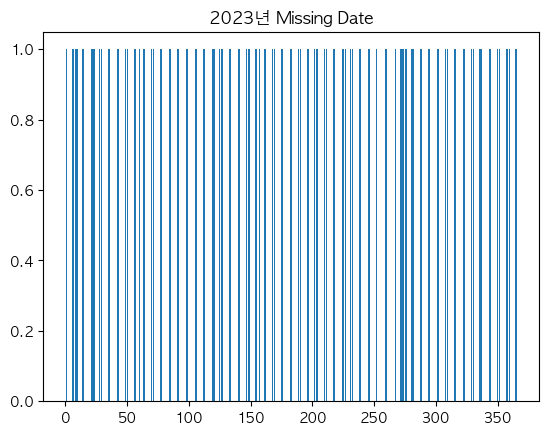

In [41]:
x = list(missing_dt)
y = [1]*len(x)
plt.bar(x,y)
plt.title('2023년 Missing Date')
plt.show()

In [229]:
for dn in ls_missing_dt:
    date = dt.datetime(2023, 1, 1) + dt.timedelta(days=dn)
    print(date.strftime('%Y-%m-%d'))

2023-01-10
2023-01-24
2023-05-02
2023-05-30
2023-10-03
2023-10-10
2023-12-26


In [99]:
every_dates = df_prices_23_apl['DOY'].unique()
len(set(range(1,366)).difference(every_dates))
# 사과: 124일치 누락

124

### ---------------

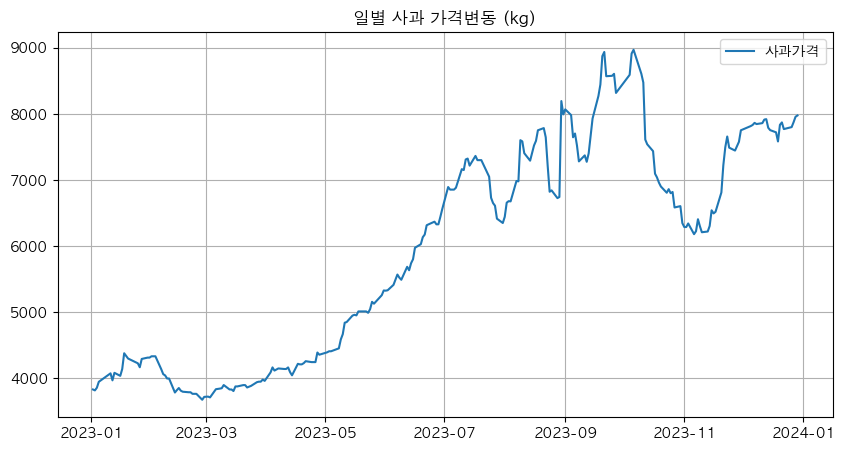

In [158]:
cols_itrs = ['PRCE_REG_YMD','PKG_PRCE']
df_plot = df_prices_23_apl[cols_itrs].groupby('PRCE_REG_YMD').mean()

unqpkg = df_prices_23_apl['WHSL_SMT_UNIT_NM'].unique()
if len(unqpkg) > 1:
    print('- 패키지 개수: ', len(df_prices_23_apl['WHSL_SMT_UNIT_NM'].unique()))
pkg_nm = df_prices_23_apl['WHSL_SMT_UNIT_NM'].unique()[-1]

x = df_plot.index
y = df_plot['PKG_PRCE']

plt.figure(figsize=(10,5))
plt.plot(x, y, label=product)
plt.legend()
plt.title(f'일별 {product} 가격변동 ({pkg_nm})')
plt.grid()
plt.show()

In [234]:
df_prices_23.query('EXMN_SE_NM=="도매"')['PDLT_NM'].unique()

array(['깐마늘(국산)', '느타리버섯', '감귤', '방울토마토', '포도', '양파', '파', '생강', '미나리',
       '깻잎', '피망', '파프리카', '멜론', '피마늘', '팽이버섯', '새송이버섯', '사과', '풋고추', '배',
       '고구마', '단감', '바나나', '감자', '파인애플', '배추', '양배추', '시금치', '상추',
       '얼갈이배추', '수박', '오이', '호박', '토마토', '딸기', '레몬', '망고', '무', '당근',
       '열무', '붉은고추', '쌀', '콩', '팥', '참깨', '들깨', '녹두', '메밀', '찹쌀', '땅콩',
       '고등어', '갈치', '명태', '물오징어', '건멸치', '북어', '건오징어', '김', '건미역', '굴',
       '건고추', '전복', '새우', '참다래', '오렌지', '체리', '참외', '알배기배추', '브로콜리',
       '복숭아', '삼치'], dtype=object)

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_946/158604512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']


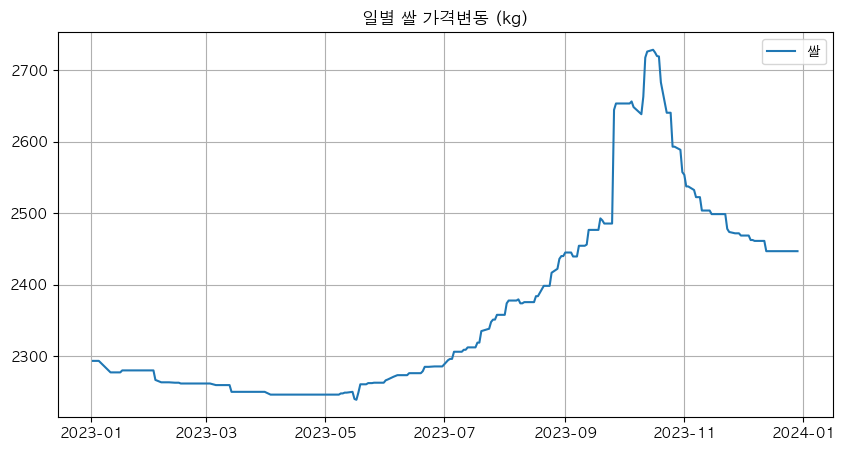

In [220]:
product = '쌀'
df_prices_23_plt = df_prices_23.query(f'PDLT_NM=="{product}" and EXMN_SE_NM=="도매"')

# kg당 가격
df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']

cols_itrs = ['PRCE_REG_YMD','PKG_PRCE']
df_plot = df_prices_23_plt[cols_itrs].groupby('PRCE_REG_YMD').mean()

unqpkg = df_prices_23_plt['WHSL_SMT_UNIT_NM'].unique()
if len(unqpkg) > 1:
    print('- 패키지 개수: ', len(df_prices_23_plt['WHSL_SMT_UNIT_NM'].unique()))
pkg_nm = df_prices_23_plt['WHSL_SMT_UNIT_NM'].unique()[-1]

x = df_plot.index
y = df_plot['PKG_PRCE']

plt.figure(figsize=(10,5))
plt.plot(x, y, label=product)
plt.legend()
plt.title(f'일별 {product} 가격변동 ({pkg_nm})')
plt.grid()
plt.show()

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_946/4265260396.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']
/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_946/4265260396.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']
/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_946

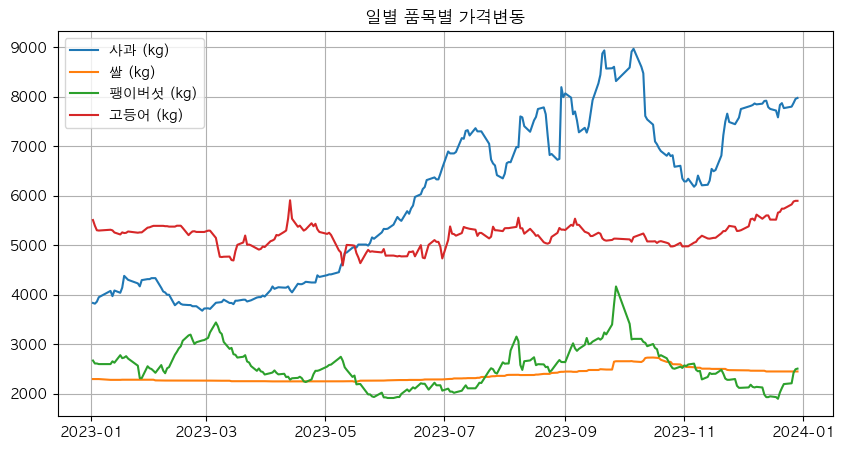

In [252]:
# 프로덕트별
ls_products = ['사과','쌀','팽이버섯','고등어']

# Basic Ploitting
plt.figure(figsize=(10,5))

for product in ls_products:    
    df_prices_23_plt = df_prices_23.query(f'PDLT_NM=="{product}" and EXMN_SE_NM=="도매"')
    
    # 단위당 가격
    df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']

    # 단위명
    unqpkg = list(df_prices_23_plt['WHSL_SMT_UNIT_NM'].unique())
    if len(unqpkg) > 1:
        print(f'- {product} 패키지 개수: ', len(df_prices_23_plt['WHSL_SMT_UNIT_NM'].unique()))
    pkg_nm = df_prices_23_plt['WHSL_SMT_UNIT_NM'].unique()[-1]
    

    cols_itrs = ['PRCE_REG_YMD','PKG_PRCE']
    df_plot = df_prices_23_plt[cols_itrs].groupby('PRCE_REG_YMD').mean()

    # Plotting
    x = df_plot.index
    y = df_plot['PKG_PRCE']
    plt.plot(x, y, label=f'{product} ({pkg_nm})')

plt.title('일별 품목별 가격변동')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 요식업 창업 리포트
# => 일별 변동성
# => 월별 변동성 (계절성)
# => 

In [144]:
# 프로덕트별 / 일별
ls_products = ['사과','쌀','팽이버섯','고등어']

ls_prdcv = []
for product in ls_products:    
    df_prices_23_plt = df_prices_23.query(f'PDLT_NM=="{product}" and EXMN_SE_NM=="도매"')
    df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']

    cols_itrs = ['PRCE_REG_YMD','PKG_PRCE']
    df_updown = df_prices_23_plt[cols_itrs].groupby('PRCE_REG_YMD').mean()


    df_updown['daily_return'] = df_updown['PKG_PRCE'].pct_change()
    std = df_updown['PKG_PRCE'].std()

    # 일일 수익률 변동성
    volatility = df_updown['daily_return'].std()

    # 변동계수
    cv = std / df_updown['PKG_PRCE'].mean()

    ls_prdcv.append([product, cv])

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1562/1278593615.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']
/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1562/1278593615.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']
/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_156

In [152]:
pd.DataFrame(ls_prdcv, columns=['product','cv'])

,product,cv
0,사과,0.271193
1,쌀,0.054488
2,팽이버섯,0.153350
3,고등어,0.047333


In [161]:
# 도매로 판매되는 전체 프로덕트
set_all_prd = set(df_prices_23.query(f'EXMN_SE_NM=="도매"')['PDLT_NM'])

f1 = df_prices_23['PDLT_NM'].apply(lambda x: x in set_all_prd)
f2 = df_prices_23['EXMN_SE_NM'] == '도매'
df_prices_23_alpd = df_prices_23[f1&f2]

# 단위별 
df_prices_23_alpd['PKG_PRCE'] = df_prices_23_alpd['PDLT_PRCE']/df_prices_23_alpd['WHSL_SMT_UNIT_MG']

cols_itrs = ['PDLT_NM','PRCE_REG_YMD','PKG_PRCE']
df_updown = df_prices_23_alpd[cols_itrs].groupby(['PDLT_NM','PRCE_REG_YMD']).mean()

ls_prdcv = []
for product in set_all_prd:
    df_tmp = df_updown.loc[product]
    df_tmp['daily_return'] = df_tmp['PKG_PRCE'].pct_change()
    
    # 표준편차
    std = df_tmp['PKG_PRCE'].std()
    # 일일 수익률 변동성
    volatility = df_tmp['daily_return'].std()
    # 변동계수
    cv = std / df_tmp['PKG_PRCE'].mean()

    ls_prdcv.append([product, cv])

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1562/58671099.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_alpd['PKG_PRCE'] = df_prices_23_alpd['PDLT_PRCE']/df_prices_23_alpd['WHSL_SMT_UNIT_MG']


In [165]:
df_alprdcv = pd.DataFrame(ls_prdcv, columns=['product','cv'])

In [171]:
i = 1
df_alprdcv.sort_values(by='cv', ascending=False).reset_index(drop=True).iloc[60:90]

,product,cv
60,들깨,0.034916
61,명태,0.028038
62,찹쌀,0.026202
63,녹두,0.025588
64,참깨,0.020728
65,건미역,0.019751
66,건오징어,0.019625
67,새우,0.013706
68,콩,0.012902
69,북어,0.010089
